The dataset used for this project can be found [here](https://www.sciencedirect.com/science/article/pii/S2352340924004219)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("energy_weather_raw_data.csv")


In [3]:
df = pd.read_csv("energy_weather_raw_data.csv")

# df = pd.get_dummies(df, columns=["main", "description"])
df.head()

,date,active_power,current,voltage,reactive_power,apparent_power,power_factor,main,description,temp,feels_like,temp_min,temp_max,pressure,humidity,speed,deg,temp_t+1,feels_like_t+1
0,2022-11-05 14:05:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.5,1013,39,0.0,0,29.63,27.97
1,2022-11-05 14:06:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.5,1013,39,0.0,0,29.63,27.97
2,2022-11-05 14:07:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.5,1013,39,0.0,0,29.63,27.97
3,2022-11-05 14:08:00,640.0,5.45,120.7,152.08,657.82,0.9729,Clear,clear sky,24.19,23.68,23.44,27.5,1013,39,0.0,0,29.63,27.97
4,2022-11-05 14:09:00,257.6,2.47,122.4,158.26,302.33,0.8520,Clear,clear sky,24.19,23.68,23.44,27.5,1013,39,0.0,0,29.63,27.97


In [4]:
# Convert timestamps to pandas datetime objects

timestamp = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S")

df.drop(columns=["date"], inplace=True)
df.insert(0, "date", timestamp)

df

,date,active_power,current,voltage,reactive_power,apparent_power,power_factor,main,description,temp,feels_like,temp_min,temp_max,pressure,humidity,speed,deg,temp_t+1,feels_like_t+1
0,2022-11-05 14:05:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.50,1013,39,0.00,0,29.63,27.97
1,2022-11-05 14:06:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.50,1013,39,0.00,0,29.63,27.97
2,2022-11-05 14:07:00,265.1,2.53,122.2,159.09,309.17,0.8575,Clear,clear sky,24.19,23.68,23.44,27.50,1013,39,0.00,0,29.63,27.97
3,2022-11-05 14:08:00,640.0,5.45,120.7,152.08,657.82,0.9729,Clear,clear sky,24.19,23.68,23.44,27.50,1013,39,0.00,0,29.63,27.97
4,2022-11-05 14:09:00,257.6,2.47,122.4,158.26,302.33,0.8520,Clear,clear sky,24.19,23.68,23.44,27.50,1013,39,0.00,0,29.63,27.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605255,2024-01-05 23:55:00,316.3,2.53,129.1,81.46,326.62,0.9684,Clouds,few clouds,12.32,10.65,8.07,13.96,1012,40,2.05,160,13.99,12.75
605256,2024-01-05 23:56:00,1526.3,13.58,124.8,736.67,1694.78,0.9006,Clouds,few clouds,12.76,11.11,8.07,13.96,1012,39,2.05,160,13.99,12.75
605257,2024-01-05 23:57:00,1528.7,13.56,124.9,729.04,1693.64,0.9026,Clouds,few clouds,12.32,10.65,8.07,13.96,1012,40,2.05,160,13.96,12.72
605258,2024-01-05 23:58:00,283.4,2.26,129.6,73.99,292.90,0.9676,Clouds,few clouds,12.76,11.11,8.07,13.96,1012,39,2.05,160,13.99,12.75


# EDA

In [5]:
list(df)

['date',
 'active_power',
 'current',
 'voltage',
 'reactive_power',
 'apparent_power',
 'power_factor',
 'main',
 'description',
 'temp',
 'feels_like',
 'temp_min',
 'temp_max',
 'pressure',
 'humidity',
 'speed',
 'deg',
 'temp_t+1',
 'feels_like_t+1']

Text(0, 0.5, 'active_power')

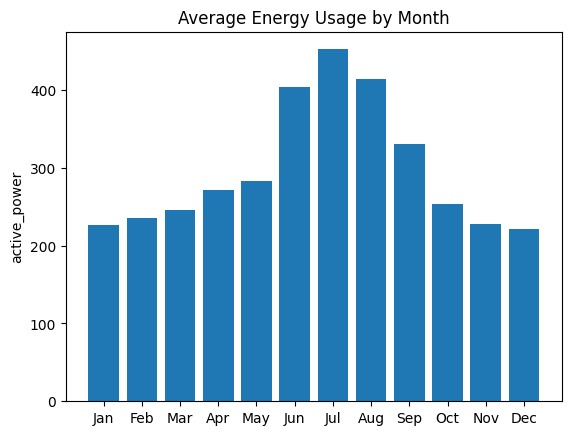

In [6]:
# Average by month

averages = []

for month in range(1,13):
    avg = df.loc[df["date"].dt.month == month, "active_power"].mean()
    averages.append(avg)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, averages)
plt.title("Average Energy Usage by Month")
plt.ylabel("active_power")

Text(0, 0.5, 'active_power')

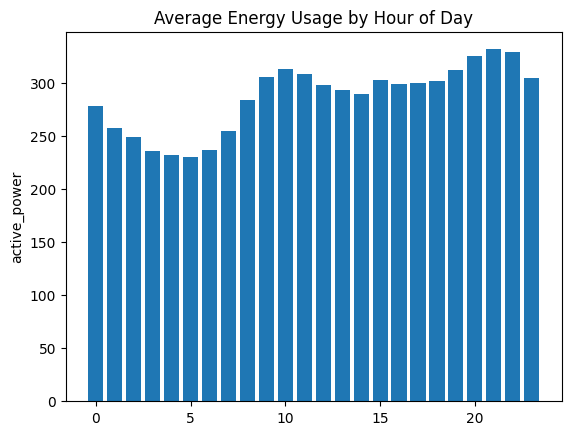

In [7]:

averages = []

for hour in range(0,24):
    avg = df.loc[df["date"].dt.hour == hour, "active_power"].mean()
    averages.append(avg)
plt.bar(range(0,24), averages)
plt.title("Average Energy Usage by Hour of Day")
plt.ylabel("active_power")

Text(0, 0.5, 'active_power')

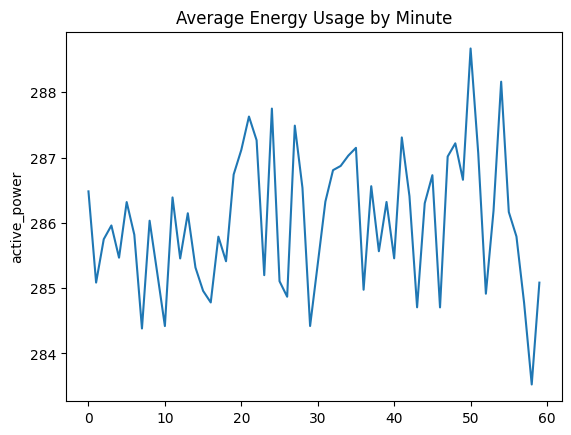

In [8]:
averages = []

for minute in range(0,60):
    avg = df.loc[df["date"].dt.minute == minute, "active_power"].mean()
    averages.append(avg)
    

plt.plot(range(0,60), averages)
plt.title("Average Energy Usage by Minute")
plt.ylabel("active_power")

Text(0, 0.5, 'active_power')

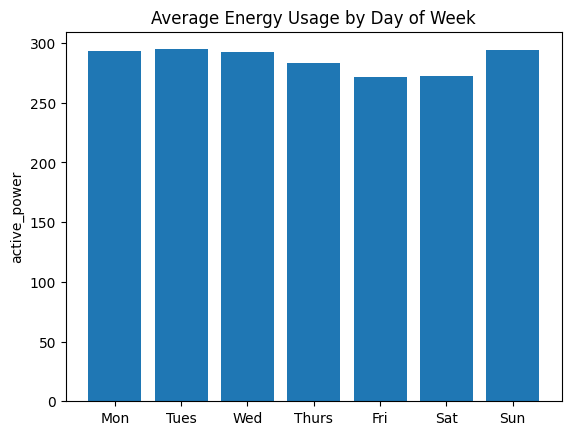

In [9]:
# See if there is any pattern for day of week

averages = []

for day in range(0,7):
    avg = df.loc[df["date"].dt.dayofweek == day, "active_power"].mean()
    averages.append(avg)
    
days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
plt.bar(days, averages)
plt.title("Average Energy Usage by Day of Week")
plt.ylabel("active_power")

Text(0, 0.5, 'active_power')

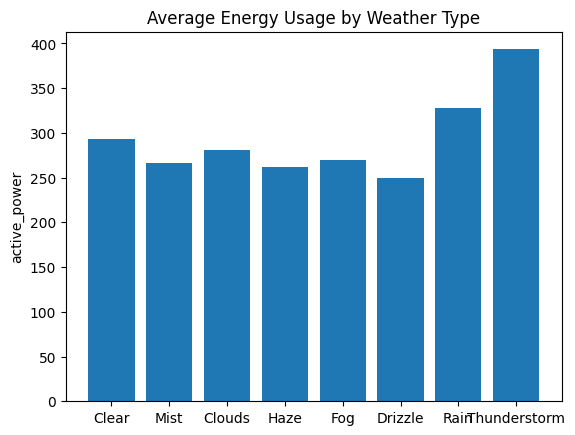

In [10]:
# Check for weather type
averages = []
for i, type in enumerate(pd.unique(df["main"])):
    avg = df.loc[df["main"] == type, "active_power"].mean()
    averages.append(avg)

plt.bar(pd.unique(df["main"]), averages)
plt.title("Average Energy Usage by Weather Type")
plt.ylabel("active_power")

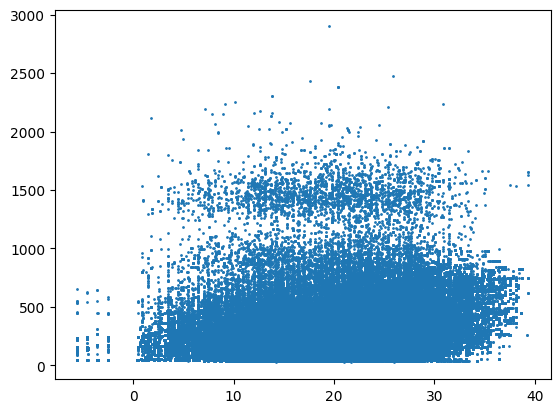

In [11]:
plt.scatter(df["temp"], df["active_power"], s=1)

# Models

In [6]:
# Setup data for training
df.insert(0, "month", df["date"].dt.month)
df.insert(0, "hour", df["date"].dt.hour)
df.insert(0, "day_of_week", df["date"].dt.day_of_week)

df.drop(columns=["date"], inplace=True)
df = pd.get_dummies(df, columns=["main", "description", "month", "hour", "day_of_week"])
df

,active_power,current,voltage,reactive_power,apparent_power,power_factor,temp,feels_like,temp_min,temp_max,...,hour_21,hour_22,hour_23,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,265.1,2.53,122.2,159.09,309.17,0.8575,24.19,23.68,23.44,27.50,...,False,False,False,False,False,False,False,False,True,False
1,265.1,2.53,122.2,159.09,309.17,0.8575,24.19,23.68,23.44,27.50,...,False,False,False,False,False,False,False,False,True,False
2,265.1,2.53,122.2,159.09,309.17,0.8575,24.19,23.68,23.44,27.50,...,False,False,False,False,False,False,False,False,True,False
3,640.0,5.45,120.7,152.08,657.82,0.9729,24.19,23.68,23.44,27.50,...,False,False,False,False,False,False,False,False,True,False
4,257.6,2.47,122.4,158.26,302.33,0.8520,24.19,23.68,23.44,27.50,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605255,316.3,2.53,129.1,81.46,326.62,0.9684,12.32,10.65,8.07,13.96,...,False,False,True,False,False,False,False,True,False,False
605256,1526.3,13.58,124.8,736.67,1694.78,0.9006,12.76,11.11,8.07,13.96,...,False,False,True,False,False,False,False,True,False,False
605257,1528.7,13.56,124.9,729.04,1693.64,0.9026,12.32,10.65,8.07,13.96,...,False,False,True,False,False,False,False,True,False,False
605258,283.4,2.26,129.6,73.99,292.90,0.9676,12.76,11.11,8.07,13.96,...,False,False,True,False,False,False,False,True,False,False


In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df.drop(columns=["current", "voltage", "active_power", "reactive_power", "apparent_power", "power_factor"])
Y = df["active_power"]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale
std_scaler = preprocessing.StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

## Linear Regression

RMSE:
Test:	 168.8574308446479
Train:	 168.58377428201555
285.8974035951491 [ 5.28454038e+01 -5.84571159e+01  1.94140691e+01  1.44122389e+01
  6.62062182e+00  6.98706274e+00 -3.00405031e+00 -1.23607437e+00
  5.37733694e+01 -3.74041336e+01 -7.43807826e-02 -7.37255830e-01
 -3.03552029e-02  2.19535407e+00  8.92643069e-01  1.07243182e+00
 -1.87626782e+00 -1.31302579e-01 -3.14407625e-01 -7.43807826e-02
 -1.01983275e+00 -3.71670200e-02  2.19535407e+00  8.92643069e-01
 -5.09504177e-01  2.43528317e-01 -1.31275532e+00  1.07243182e+00
 -1.41499791e+00 -4.33005852e+00  3.56878607e+00 -2.61789036e-01
  5.32123220e-01 -7.44724521e-01 -9.93794257e+00 -8.05375257e+00
 -1.00870342e+01 -4.20970363e+00 -3.21071506e+00  1.87779932e+01
  3.40340322e+01  2.60708959e+01  4.97542922e+00 -8.54582252e+00
 -1.50758977e+01 -1.38941552e+01  1.94104576e+00 -1.43109847e+00
 -2.66096377e+00 -5.35959210e+00 -5.74029562e+00 -5.99099256e+00
 -4.73277254e+00 -2.00886092e+00  1.74987950e+00  3.78758592e+00
  3.00416437e+

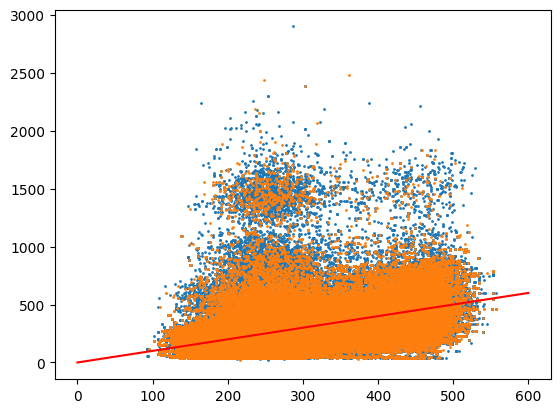

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import numpy as np

model = LinearRegression()

model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("RMSE:")
print("Test:\t", root_mean_squared_error(Y_test, Y_test_pred))
print("Train:\t", root_mean_squared_error(Y_train, Y_train_pred))

x=np.linspace(0, 600, 100)

plt.scatter(Y_train_pred, Y_train, s= 1)
plt.scatter(Y_test_pred, Y_test, s=1)

plt.plot(x,x, c="red")

print(model.intercept_, model.coef_)

## Random Forest Regression
Random forest regression works by creating several decision trees, each using only a subset of the data.  

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Model with no pruning
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("RMSE:")
print("Test:\t", root_mean_squared_error(Y_test, Y_test_pred))
print("Train:\t", root_mean_squared_error(Y_train, Y_train_pred))

RMSE:
Test:	 117.721244485849
Train:	 91.7483069248212


In [9]:
# Loop through some possible hyperparameter combinations

max_depth = [30, 40, 50] # Max depth. More => Lower bias
msl_values = [2, 4, 6] # Minimum samples at each leaf node.  More => Lower variance
mss_values = [5,10,15] # Minimum samples to split

train_loss = np.zeros((3,3,3))
test_loss = np.zeros((3,3,3))

for ii, n in enumerate(mss_values):
    for jj, depth in enumerate(max_depth):
        for kk, msl in enumerate(msl_values):
            model = RandomForestRegressor(min_samples_split=n, min_samples_leaf=msl, max_depth=depth, criterion='squared_error', n_jobs=-1, random_state=42)
            model.fit(X_train, Y_train)

            Y_test_pred = model.predict(X_test)
            Y_train_pred = model.predict(X_train)

            train_loss[ii, jj, kk] = mean_squared_error(Y_train_pred, Y_train)
            test_loss[ii, jj, kk] = mean_squared_error(Y_test_pred, Y_test)

            print("Min Samples Split=", n, "\t Depth=", depth, "\t Min Samples/Leaf=", msl, "\t Train: ", train_loss[ii,jj, kk], "\t Test: ", test_loss[ii,jj,kk])

Min Samples Split= 5 	 Depth= 30 	 Min Samples/Leaf= 2 	 Train:  9390.83784647777 	 Test:  13522.832421289926
Min Samples Split= 5 	 Depth= 30 	 Min Samples/Leaf= 4 	 Train:  10058.876912713093 	 Test:  13358.602864063076
Min Samples Split= 5 	 Depth= 30 	 Min Samples/Leaf= 6 	 Train:  10593.267607848935 	 Test:  13421.434926996673
Min Samples Split= 5 	 Depth= 40 	 Min Samples/Leaf= 2 	 Train:  9030.724190495395 	 Test:  13366.841771781996
Min Samples Split= 5 	 Depth= 40 	 Min Samples/Leaf= 4 	 Train:  9717.04453579148 	 Test:  13152.921286771192
Min Samples Split= 5 	 Depth= 40 	 Min Samples/Leaf= 6 	 Train:  10271.655833502333 	 Test:  13199.757866665579
Min Samples Split= 5 	 Depth= 50 	 Min Samples/Leaf= 2 	 Train:  9014.693737611218 	 Test:  13370.403838523927
Min Samples Split= 5 	 Depth= 50 	 Min Samples/Leaf= 4 	 Train:  9699.920456735557 	 Test:  13147.605279047713
Min Samples Split= 5 	 Depth= 50 	 Min Samples/Leaf= 6 	 Train:  10254.791177014442 	 Test:  13191.082847705131

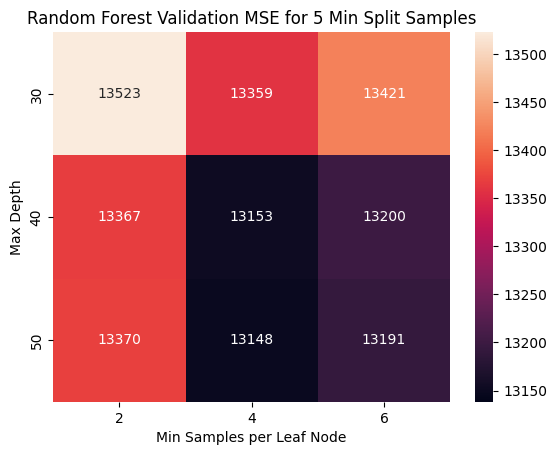

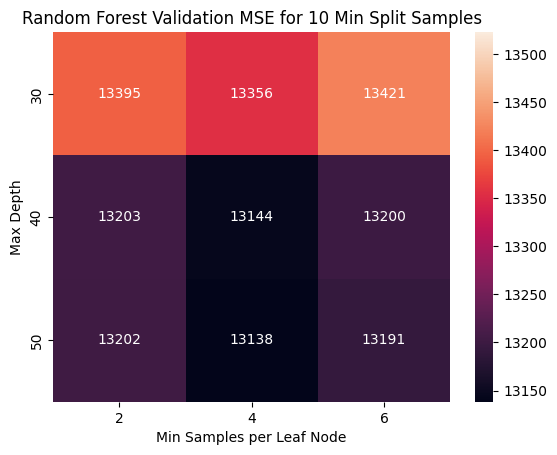

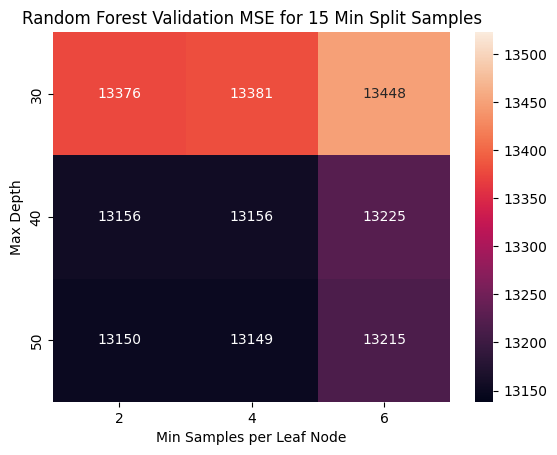

In [11]:
for ii, n in enumerate(mss_values):
    plt.figure()
    ax = sns.heatmap(test_loss[ii,:,:], annot=True, vmin=np.min(test_loss), vmax= np.max(test_loss), fmt=".0f")

    ax.set_xticklabels(msl_values)
    ax.set_yticklabels(max_depth)

    ax.set_xlabel("Min Samples per Leaf Node")
    ax.set_ylabel("Max Depth")
    ax.set_title("Random Forest Validation MSE for " + str(n) + " Min Split Samples")

In [ ]:
# Try the best to see if it works better than with no pruning
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=4, min_samples_split=10, max_depth=50, criterion='squared_error', n_jobs=-1)
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("Train RMSE:\t", root_mean_squared_error(Y_train, Y_train_pred))
print("Test RMSE:\t", root_mean_squared_error(Y_test, Y_test_pred))

Train RMSE:	 98.79637067863764
Test RMSE:	 114.58540424615691


In [33]:
# Try the with more trees to see if there is an improvement
model = RandomForestRegressor(n_estimators=200, min_samples_leaf=4, min_samples_split=10, max_depth=50, criterion='squared_error', n_jobs=-1)
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("Train RMSE:\t", root_mean_squared_error(Y_train, Y_train_pred))
print("Test RMSE:\t", root_mean_squared_error(Y_test, Y_test_pred))

Train RMSE:	 98.74057410786197
Test RMSE:	 114.55335501224526


# Support Vector Regression

### SVR

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Support vector regression does not scale well with large datasets, so we're using a small subset to tune hyperparameters
df_subset = df.sample(n=30000, random_state=42)

X = df_subset.drop(columns=["current", "voltage", "active_power", "reactive_power", "apparent_power", "power_factor"])
Y = df_subset["active_power"]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale
std_scaler = preprocessing.StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [22]:
from sklearn.model_selection import GridSearchCV

model = SVR()
# Grid search:
param_grid = [
    {'kernel': ['rbf'],
     'gamma': ['scale',1e-3, 1e-4],
     'C': [10, 100, 1000],
     'epsilon': [10, 50, 100]
    },
    {'kernel': ['poly'],
     'degree': [2,3,4],
     'C': [10, 100, 1000],
     'epsilon': [10, 50, 100]
    }
]

search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="neg_mean_squared_error", n_jobs=-1)
search.fit(X_train, Y_train)

results = pd.DataFrame(search.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_gamma,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,94.883471,12.521120,21.535025,3.334807,10,10,scale,rbf,NaN,"{'C': 10, 'epsilon': 10, 'gamma': 'scale', 'ke...",-29413.725935,-26199.493824,-29946.378733,-29729.310040,-24875.670622,-28032.915831,2086.881103,28
1,76.922682,9.527784,17.994096,1.759572,10,10,0.001,rbf,NaN,"{'C': 10, 'epsilon': 10, 'gamma': 0.001, 'kern...",-30964.619667,-27671.831798,-31460.471921,-31287.944677,-26233.284974,-29523.630607,2153.886770,47
2,72.432086,2.579534,17.820885,0.888635,10,10,0.0001,rbf,NaN,"{'C': 10, 'epsilon': 10, 'gamma': 0.0001, 'ker...",-34066.841103,-30422.012720,-35002.516240,-34205.681093,-28762.190755,-32491.848382,2446.051651,54
3,56.358798,2.974373,14.453162,2.054233,10,50,scale,rbf,NaN,"{'C': 10, 'epsilon': 50, 'gamma': 'scale', 'ke...",-29133.484585,-26099.754018,-29798.851859,-29627.568586,-24833.978412,-27898.727492,2037.301239,26
4,63.986587,6.651101,14.726412,2.165749,10,50,0.001,rbf,NaN,"{'C': 10, 'epsilon': 50, 'gamma': 0.001, 'kern...",-30780.956957,-27537.924302,-31315.108888,-31088.396441,-26160.506068,-29376.578531,2115.857780,46
5,56.856361,5.101231,15.770240,2.770371,10,50,0.0001,rbf,NaN,"{'C': 10, 'epsilon': 50, 'gamma': 0.0001, 'ker...",-34014.214478,-30386.918521,-34934.114267,-34156.486347,-28743.397918,-32447.026306,2430.014249,53
6,35.584586,1.903818,8.806641,0.805761,10,100,scale,rbf,NaN,"{'C': 10, 'epsilon': 100, 'gamma': 'scale', 'k...",-29114.847709,-26055.254678,-29593.102444,-29438.617250,-24791.243011,-27798.613018,1986.245332,24
7,35.905731,2.482824,8.895478,1.097447,10,100,0.001,rbf,NaN,"{'C': 10, 'epsilon': 100, 'gamma': 0.001, 'ker...",-30649.276046,-27386.624705,-31179.662134,-30915.861154,-26049.275031,-29236.139814,2105.825733,44
8,41.795161,4.448508,10.929186,1.537131,10,100,0.0001,rbf,NaN,"{'C': 10, 'epsilon': 100, 'gamma': 0.0001, 'ke...",-33768.335957,-30193.773376,-34750.262871,-33884.035103,-28665.906215,-32252.462705,2379.096260,52
9,80.388634,6.755932,20.193801,3.455972,100,10,scale,rbf,NaN,"{'C': 100, 'epsilon': 10, 'gamma': 'scale', 'k...",-27886.989483,-24788.113963,-28571.035262,-28127.142442,-23508.014845,-26576.259199,2035.385519,16


In [23]:
from sklearn.metrics import mean_squared_error
# Train the model using the best hyperparameters and test on a separate validation set
model = SVR(kernel='rbf', gamma='scale', C=1000, epsilon=50)

model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("RMSE:")
print("Test:\t", root_mean_squared_error(Y_test, Y_test_pred))
print("Train:\t", root_mean_squared_error(Y_train, Y_train_pred))

RMSE:
Test:	 154.9523851627526
Train:	 136.0952156581129


In [24]:
# Using the second-best set of hyperparameters
model = SVR(kernel='rbf', gamma='scale', C=1000, epsilon=100)

model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("RMSE:")
print("Test:\t", root_mean_squared_error(Y_test, Y_test_pred))
print("Train:\t", root_mean_squared_error(Y_train, Y_train_pred))

RMSE:
Test:	 155.2019765413096
Train:	 139.24857216375196


In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Try the best paramters on a larger subset
df_subset = df.sample(n=100000, random_state=42)

X = df_subset.drop(columns=["current", "voltage", "active_power", "reactive_power", "apparent_power", "power_factor"])
Y = df_subset["active_power"]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale
std_scaler = preprocessing.StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [9]:
model = SVR(kernel='rbf', gamma='scale', C=1000, epsilon=50)

model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

In [10]:
from sklearn.metrics import root_mean_squared_error

print("RMSE:")
print("Test:\t", root_mean_squared_error(Y_test, Y_test_pred))
print("Train:\t", root_mean_squared_error(Y_train, Y_train_pred))

RMSE:
Test:	 142.23261228728745
Train:	 140.19236057705652
